In [ ]:
import os
import json
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pathlib import Path

In [9]:
# Define Paths
PROJECT_DIR_PATH = Path.cwd()
DATA_DIR_PATH = PROJECT_DIR_PATH / "data"

In [10]:
# Set Korean font for Windows
plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' if installed
plt.rcParams['axes.unicode_minus'] = False

In [11]:
## First reading data dict_to raw data for more visibility
df = pd.read_excel(DATA_DIR_PATH / "(HRC250611) 2023년 수원서베이 용역_공개용 데이터(엑셀).xlsx")

In [12]:
with open(DATA_DIR_PATH / "variable_dictionary.json", "r", encoding="utf-8") as f:
    var_dict = json.load(f)

In [13]:
# Set the first row as column headers
questions = df.columns

df.columns = df.iloc[0]

# Drop the first row from the dataset
df = df[1:].reset_index(drop=True)
df

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
0,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,1,2,1,2,7,2,2,2,1,3
1,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,3,7,3,1,2,2,3
2,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,2,6,3,2,2,2,3
3,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,1,2,1,4,5,3,2,2,2,3
4,54,3,1981,1976,2013,NaN,NaN,NaN,1,NaN,...,1,1,2,3,6,3,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2446,1,1986,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1,1,2,2,3,1,2,3,3,3
2037,2447,3,1963,1967,1991,NaN,NaN,NaN,NaN,NaN,...,3,1,1,2,7,2,3,2,3,3
2038,2448,2,1950,1951,NaN,NaN,NaN,NaN,NaN,2,...,3,2,1,4,1,2,1,2,2,3
2039,2449,3,1969,1971,1992,NaN,NaN,NaN,1,NaN,...,2,2,1,2,4,3,2,2,2,3


In [14]:
for col, metadata in var_dict.items():
    if col in df.columns:
        mapping = {float(k): v for k, v in metadata['values'].items()}
        df[col] = df[col].astype(float).map(mapping)

In [15]:

new_row_df = pd.DataFrame([questions], columns=df.columns)

# Add to the top of your existing DataFrame
df = pd.concat([new_row_df, df], ignore_index=True)

# ✅ Now df has your list at index 0

In [16]:
df.head()

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
0,Unnamed: 0,총 가구원 수,출생년도1,출생년도2,출생년도3,출생년도4,출생년도5,출생년도6,코드1,코드2,...,현재 집 거주 기간,주택 유형,주택 점유 형태,직업,월평균 가구소득,경제사회적 위치,정치성향,정책 관심도,시민의견 수렴 정도,수원시정 만족도
1,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,700만원 이상,중간,중도,보통,미반영,만족
2,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,블루칼라,700만원 이상,상위,보수,보통,보통,만족
3,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,600~700만원 미만,상위,중도,보통,보통,만족
4,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,기타,500~600만원 미만,상위,중도,보통,보통,만족


---

In [17]:
question_texts = df.iloc[0]

# Find columns where the question contains '교통'
transportation_columns = question_texts[question_texts.str.contains('교통', na=False)]

In [18]:
df_trans = df[transportation_columns.index].drop(index=0).reset_index(drop=True)

# Set plot style
sns.set(style="whitegrid")

# Plot each column
for col in df_trans.columns:
    print("*******")
    print(df_trans[col].value_counts())

*******
Q6i1
지출 있음    1394
지출 없음     647
Name: count, dtype: int64
*******
Q6i2
20만원 미만        1307
20~ 40만원 미만      78
40~ 60만원 미만       8
60~ 80만원 미만       1
Name: count, dtype: int64
*******
Q15a1
⑤           933
⑥           615
④보통         307
③           125
⑦매우 만족한다     34
②            27
Name: count, dtype: int64
*******
Q15a2
⑤           771
⑥           604
④보통         424
③           140
⑦매우 만족한다     60
②            42
Name: count, dtype: int64
*******
Q15a3
⑤           916
④보통         520
⑥           389
③           172
⑦매우 만족한다     27
②            17
Name: count, dtype: int64
*******
Q15a4
⑤               890
④보통             547
⑥               414
③               127
②                39
⑦매우 만족한다         22
①전혀 만족하지 않는다      2
Name: count, dtype: int64
*******
Q15a5
④보통             801
⑤               623
③               293
⑥               179
②                80
①전혀 만족하지 않는다     59
⑦매우 만족한다          6
Name: count, dtype: int64
*******
Q16a1
⑤                1011
⑥         

In [19]:
df_trans.isna().sum()

0
Q6i1          0
Q6i2        647
Q15a1         0
Q15a2         0
Q15a3         0
Q15a4         0
Q15a5         0
Q16a1         0
Q16a2         0
Q16a3         0
Q16a4         0
Q17_2       468
Q17_2op    2039
Q23b3         0
Q48a2         0
Q49a10        0
Q50a2         0
dtype: int64

## Result
- No vars requires the reverse coding to use Likert Scale

In [20]:
df_trans= df[df_trans.columns]

In [21]:
df_trans.head()

,Q6i1,Q6i2,Q15a1,Q15a2,Q15a3,Q15a4,Q15a5,Q16a1,Q16a2,Q16a3,Q16a4,Q17_2,Q17_2op,Q23b3,Q48a2,Q49a10,Q50a2
0,문6. 지출 유무 - 9. 대중교통비,문6. 지출 금액 - 9. 대중교통비,"문15. 대중교통 수단 만족도 - 1. 버스(시내, 마을버스 등)",문15. 대중교통 수단 만족도 - 2. 지하철(기차 포함),문15. 대중교통 수단 만족도 - 3. 택시,문15. 대중교통 수단 만족도 - 4. 시외버스/고속버스,문15. 대중교통 수단 만족도 - 5. 킥보드 등 개인형 이동수단(PM),문16. 수원시 교통환경 - 1. 교통인프라 환경,문16. 수원시 교통환경 - 2. 교통약자 이용 환경,문16. 수원시 교통환경 - 3. 자전거 등 개인 이동수단 환경,문16. 수원시 교통환경 - 4. 보행환경,문17-2. 통근·통학 시 이용 교통수단,문17-2. 통근·통학 시 이용 교통수단_기타,문23. 환경보전 및 기후변화 대응하기 위한 실천 노력(수송) - 3. 친환경 교통...,문48. 수원시 10대 비전(탄탄한 경제 특례시) - 2. 편리하고 효율적인/ 첨단...,문49. 수원시의 바람직한 미래상 - 10. 편리한 교통 도시 수원,문50. 수원시 정책분야 중요도 - 2. 교통
1,지출 있음,20만원 미만,⑥,⑦매우 만족한다,⑥,⑥,③,⑥,④보통,③,⑤,자차(승용차),NaN,④보통,⑦매우 중요하다,⑥,⑥
2,지출 없음,NaN,⑤,⑤,⑥,⑤,④보통,⑤,⑥,⑤,⑤,자차(승용차),NaN,⑤,⑥,⑤,⑤
3,지출 있음,20만원 미만,⑤,⑥,⑥,⑤,⑥,⑤,⑤,④보통,⑤,"시내버스, 마을버스",NaN,⑥,⑦매우 중요하다,⑥,⑦매우 중요하다
4,지출 있음,20만원 미만,⑥,⑥,⑤,⑥,④보통,⑥,⑥,⑤,⑤,NaN,NaN,⑤,⑥,⑥,⑥


In [22]:
## RE-econding var for visibility

mapping = {
    "①": "①전혀 중요하지 않다",
    "②": "②중요하지 않다",
    "③": "③약간 중요하지 않다",
    "④": "④보통",
    "⑤": "⑤약간 중요하다",
    "⑥": "⑥중요하다",
    "⑦": "⑦매우 중요하다",
    "⑦매우 중요하다": "⑦매우 중요하다",  # Normalize this variant
    "④보통": "④보통",                  # Normalize this variant
}

In [23]:
mapping.keys()

dict_keys(['①', '②', '③', '④', '⑤', '⑥', '⑦', '⑦매우 중요하다', '④보통'])

Total barplots: 17


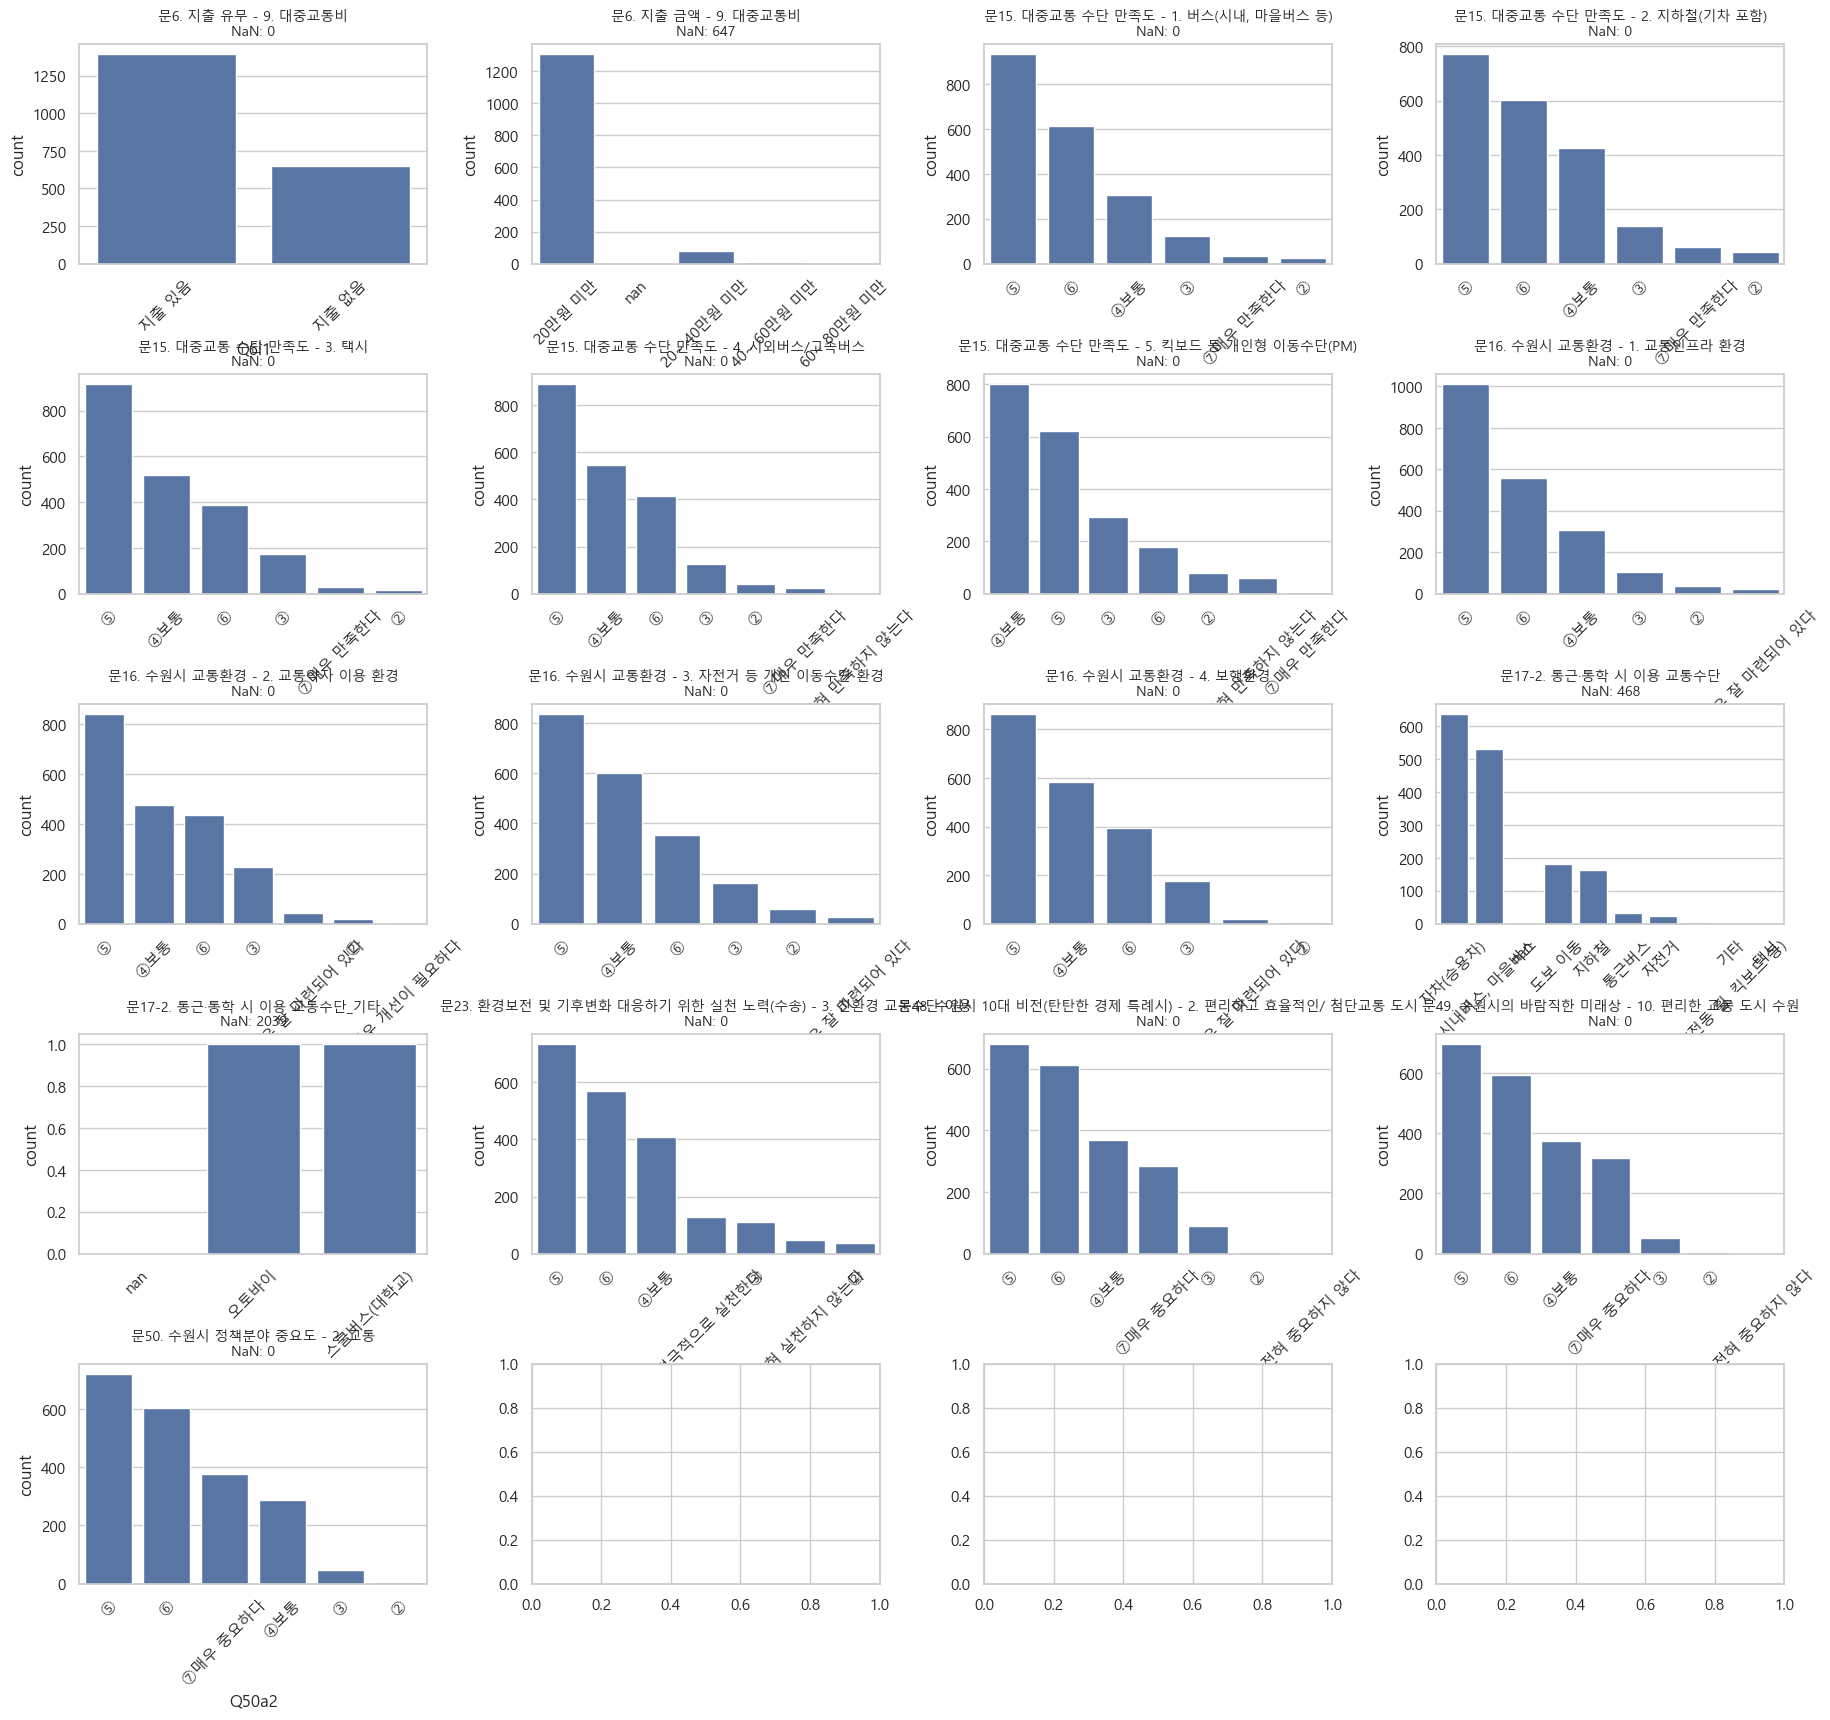

In [35]:
# Upadate 2025-08-09
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Korean font for Windows
plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' if installed
plt.rcParams['axes.unicode_minus'] = False

# -------- 옵션 --------
PER_PAGE = 12          # 한 페이지당 플롯 개수
TOP_K_LEVELS = None    # 범주 레벨이 너무 많으면 상위 K개만 보여주고 나머지는 '기타'로 묶기. 미사용 시 None
# ----------------------

def pick_cols_per_row(n):
    if n <= 4:   return 2
    if n <= 12:  return 3
    return 4

def cap_levels(series: pd.Series, top=10, other="기타"):
    if top is None:
        return series
    s = series.astype("object")
    vc = s.value_counts(dropna=True)
    keep = set(vc.index[:top])
    mask = s.isin(keep) | s.isna()
    return s.where(mask, other)

def plot_univariate_grid(df_trans: pd.DataFrame, page: int = 1, per_page: int = PER_PAGE, top_k_levels: int | None = TOP_K_LEVELS):
    cols = df_trans.columns.tolist()
    n_plots = len(cols)
    print(f"Total barplots: {n_plots}")

    start = (page - 1) * per_page
    end   = start + per_page
    cols_chunk = cols[start:end]
    if not cols_chunk:
        print("해당 페이지에 표시할 컬럼이 없습니다.")
        return

    col_per_row = pick_cols_per_row(len(cols_chunk))
    rows = math.ceil(len(cols_chunk) / col_per_row)

    fig, axes = plt.subplots(rows, col_per_row, figsize=(col_per_row * 5.5, rows * 4.0), constrained_layout=False)
    axes = np.atleast_1d(axes).ravel()

    for ax, (j, col) in zip(axes, enumerate(cols_chunk, start=start)):
        if j is None:  # 빈 축
            ax.set_visible(False)
            continue

        title_text = df_trans.iloc[0, j]
        s = df_trans[col].iloc[1:]
        s = cap_levels(s, top=top_k_levels) if top_k_levels else s

        vc = s.value_counts(dropna=False)
        value_counts = vc.reset_index()
        value_counts.columns = [col, "count"]
        order = value_counts[col].tolist()
        nan_vars = s.isna().sum()

        sns.barplot(data=value_counts, x=col, y="count", order=order, ax=ax)
        ax.set_title(f"{title_text}\nNaN: {nan_vars}", fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel("count")
        ax.tick_params(axis="x", rotation=45)

    # 간격 조정
    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace는 세로 간격, wspace는 가로 간격
    plt.show()

# 사용 예시:
# 1페이지(최대 20개)
plot_univariate_grid(df_trans, page=1, per_page=20, top_k_levels=None)

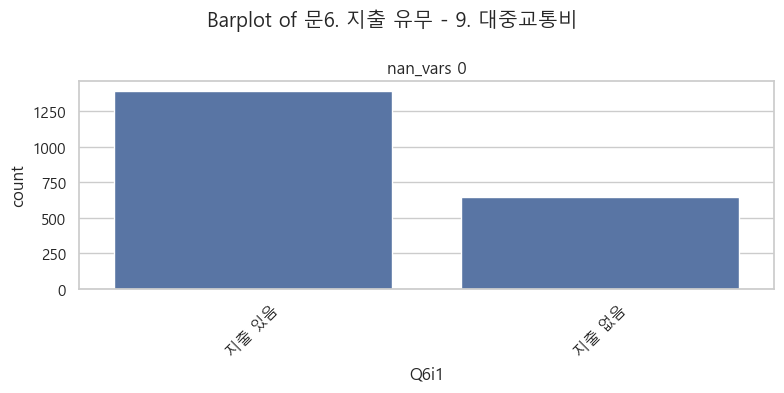

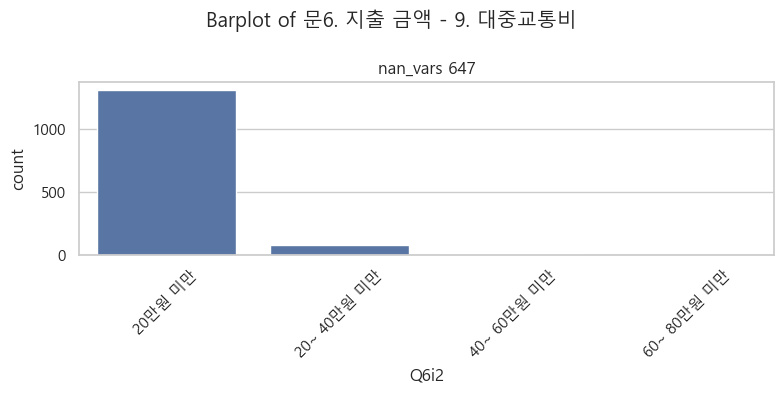

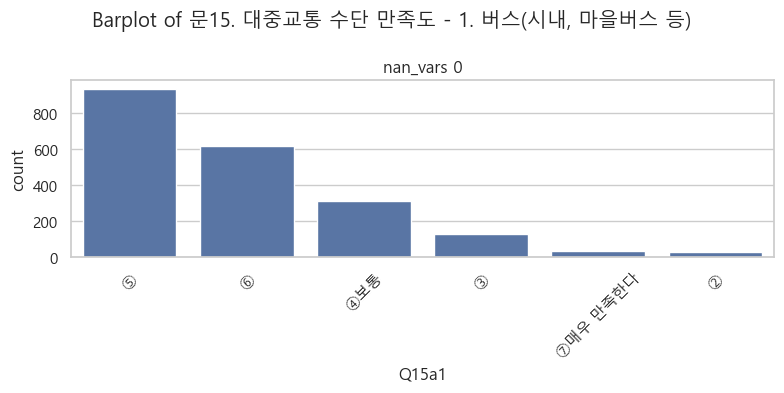

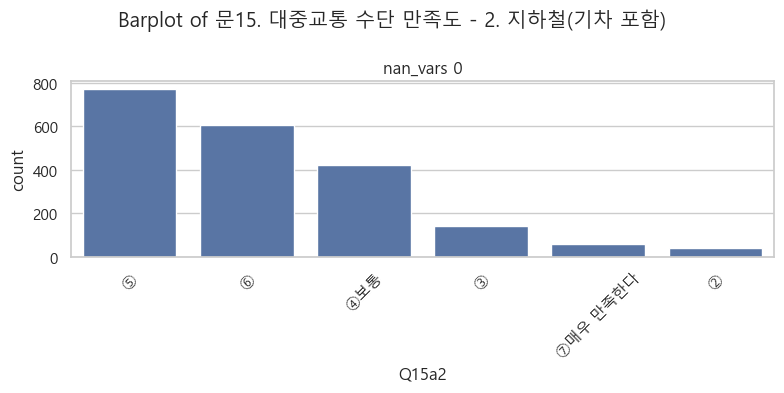

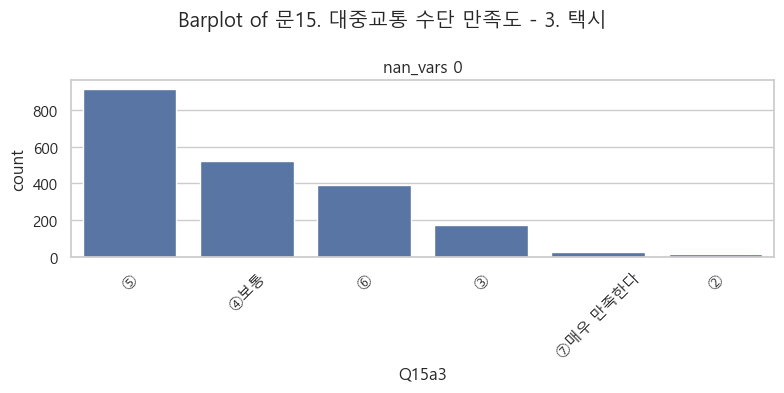

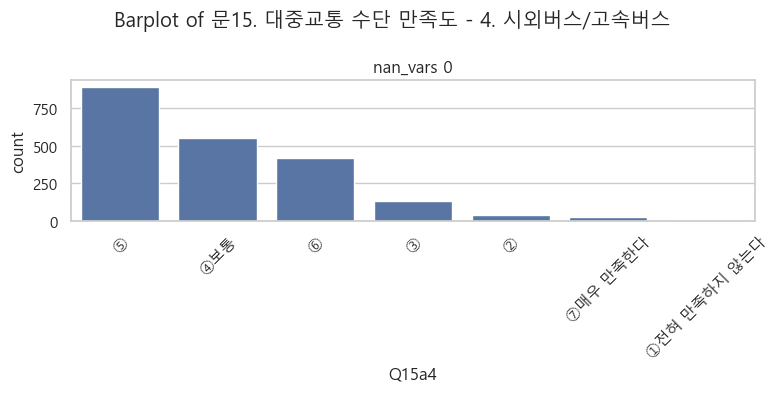

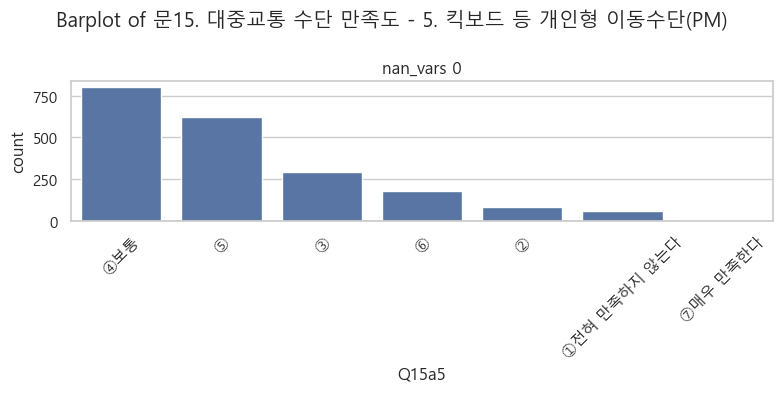

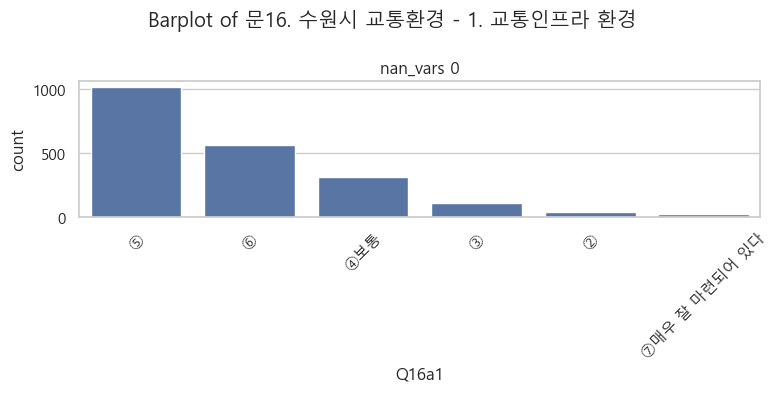

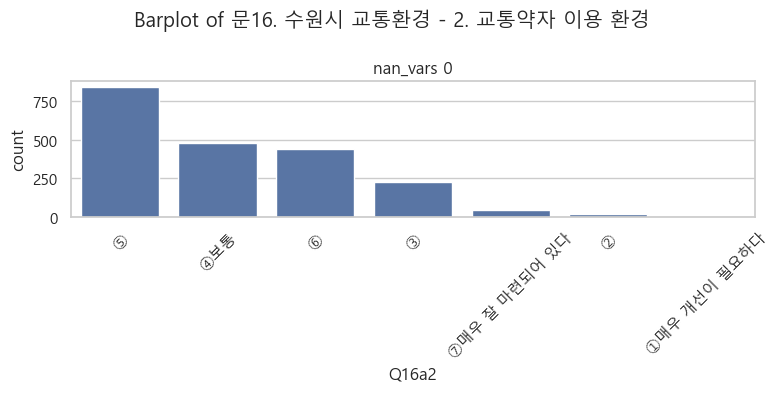

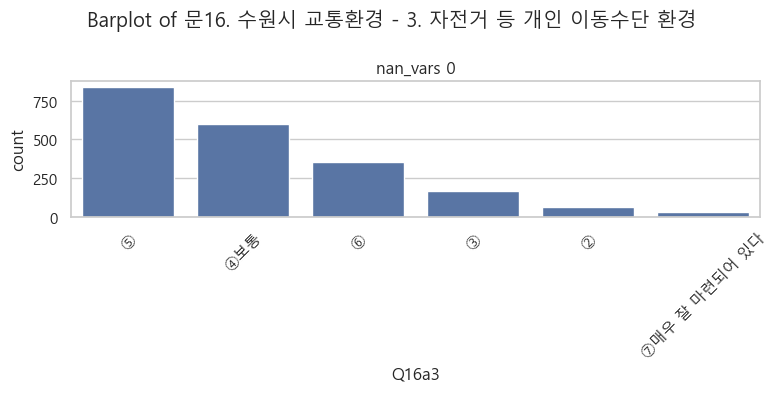

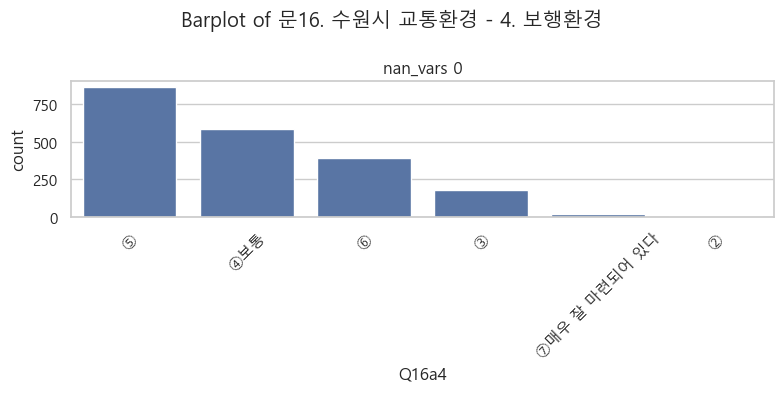

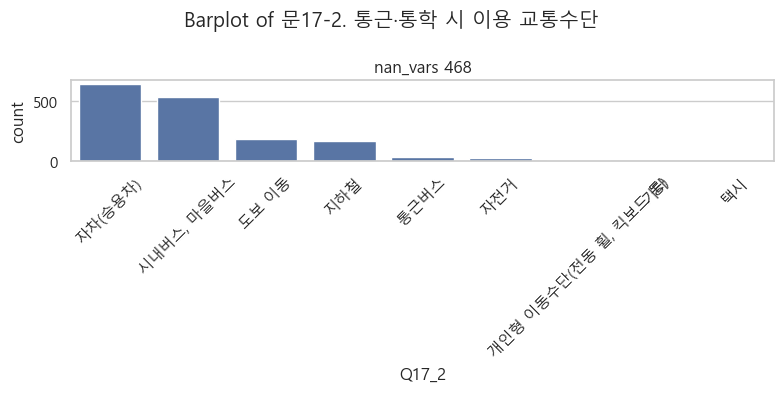

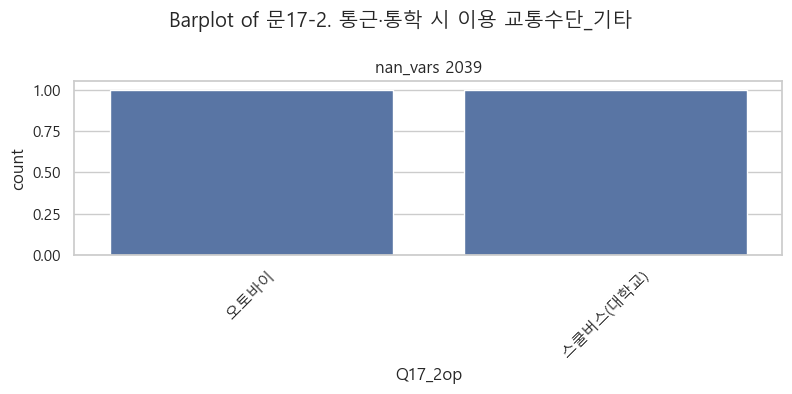

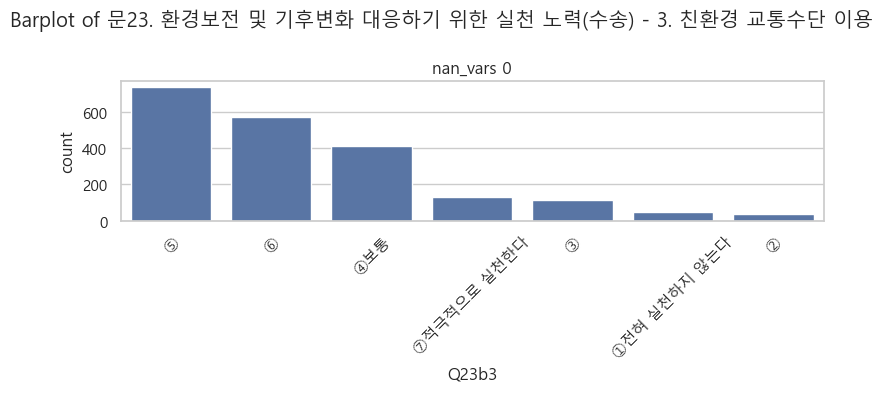

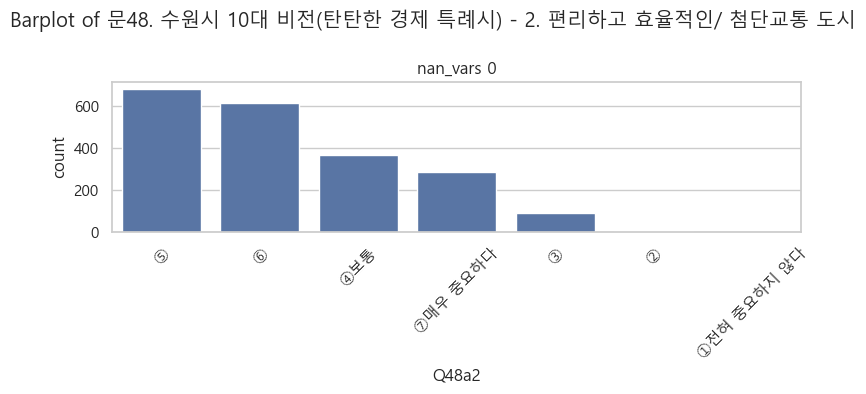

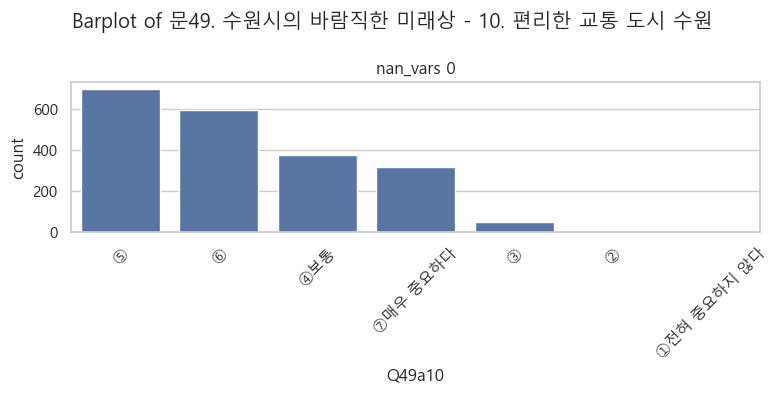

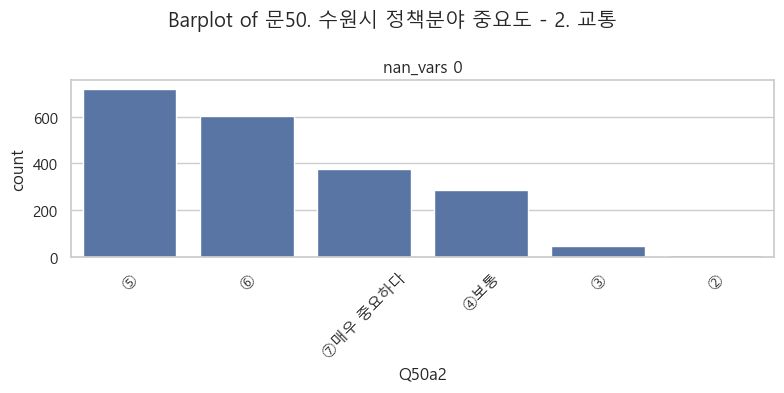

In [25]:
# (김승환) 2025-08-07

## Univariate eda
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set Korean font for Windows
plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' if installed
plt.rcParams['axes.unicode_minus'] = False

# Loop through each column in the DataFrame
j = 0

for i in df_trans.columns:
    plt.figure(figsize=(8, 4))
    
    # Skip the first row (assuming it's metadata or header info)
    value_counts = df_trans[i][1:].value_counts().reset_index()
    value_counts.columns = [i, 'count']
    nan_vars = df_trans[i][1:].isna().sum()
    
    # Use j to get the title from the first row
    title_text = df_trans.iloc[0, j]
    
    # Plot
    sns.barplot(data=value_counts, x=i, y='count')
    plt.suptitle(f'Barplot of {title_text}')
    plt.title(f'nan_vars {nan_vars}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Increment j
    j += 1
